# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 104)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,ASG002_BC3C_24H:C13,...,MOAR010_BC3C_24H:L20,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08,MOAR011_BC3C_24H:F09,MOAR011_BC3C_24H:J10
Androgen,-0.051863,-0.008976,0.001774,-0.039996,0.001823,0.020283,0.004023,0.016199,0.021165,0.036052,...,-0.044942,-0.015609,-0.001692,-0.008850,-0.052073,-0.005035,-0.054372,0.029677,0.025971,-0.586241
CDK1_2,-0.759049,-0.611922,0.077723,-0.082241,0.089054,-0.283650,0.022446,-0.286249,0.120503,0.058715,...,-0.011907,-0.011212,-0.110485,0.059840,-0.061385,-0.015201,-0.841614,0.108911,-0.056299,0.125358
CDK4_6,-0.025567,-0.234168,-0.041919,-0.515725,0.040858,0.002390,-0.007771,0.097431,0.086049,0.032357,...,-0.575407,0.048657,0.097651,-0.089471,-1.040097,-1.211090,0.318775,0.199396,-0.063239,-0.014519
EGFR,0.595782,0.496815,0.227585,0.366149,0.490477,0.113908,-0.413856,0.264051,0.285211,-0.046581,...,0.178875,0.043486,-0.055520,-0.035948,-0.086028,-0.423306,-0.436250,-0.555279,-0.315910,-0.226343
Estrogen,-0.124280,-0.206679,-0.210077,-0.409447,-0.945416,-0.310837,-0.085250,-0.236102,-0.162541,-0.040320,...,-0.082222,0.059878,0.040465,-0.011440,0.024035,0.134761,-1.506856,-0.227091,0.183448,-0.249039
FGFR,-0.110421,-0.176572,-0.089340,0.051532,-0.028245,-0.406904,-0.033083,-0.026544,-0.061630,-0.300778,...,0.159162,-0.032003,0.048352,-0.023058,0.027569,-0.236628,-0.548688,0.023450,0.221776,0.037643
PI3K,-1.890030,-1.697742,-1.423687,-1.228907,-0.701938,0.297987,-0.150765,-0.182905,-0.861318,-0.277769,...,-0.035034,-0.179601,-0.053394,-0.525680,-0.522395,0.003859,-0.843794,0.216692,-0.238250,0.004889
p53,-0.209905,-0.218104,-0.126854,-0.404891,0.049871,-1.630171,-1.476223,-0.119955,-0.088071,-1.328128,...,-0.304598,0.247399,0.025498,0.231702,0.200218,0.279257,-0.225392,-0.049859,0.030063,0.599728
TOP2A,-0.227390,0.074887,-0.235013,-0.172128,-0.126695,0.054097,0.071529,-2.000953,-0.205740,-0.287905,...,0.053221,0.099870,0.077575,-0.177121,-0.523505,0.050589,-0.751306,-0.008967,-0.032708,-0.439585
Src,-0.930403,-1.678796,0.522821,-1.206341,0.571286,-1.127422,0.495679,0.393984,0.397012,0.447155,...,0.073682,-0.197400,0.060819,0.062738,-0.104216,-0.012540,0.040212,0.245081,0.777876,-0.155730


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-32.29022953772266
19.755130612438


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 104)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [8]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing _jan_25.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1_2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Src,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1_2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Src,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [10]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [11]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [12]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.007116,0.645652,0.000000,0.623420,1.000000,0.00000,0.000000,0.924077,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.393338,0.0,0.0,0.0
EGFR,0.0,0.000000,1.000000,0.000000,0.000000,0.327704,1.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.584453,0.0,0.0,0.0
FGFR,0.0,0.000000,0.032631,1.000000,0.104173,0.000000,0.927945,1.00000,0.000000,0.010490,0.0,0.0,0.0
PI3K,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.0,0.0,0.0
p53,0.0,0.000769,0.000096,1.000000,0.001980,0.000639,0.997777,0.00000,0.004315,0.001327,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,1.000000,0.011143,0.000000,1.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.012489,0.000000,0.987511,1.000000,0.000000,0.012489,0.00000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000e+00,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000e+00,8.405595e-02,4.783152e-01,0.000000e+00,4.845281e-01,2.886580e-15,0.000000e+00,0.000000e+00,0.264874,0.0,0.0,0.0
CDK4_6,0.0,0.000000e+00,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,2.442491e-15,0.000000e+00,0.000000e+00,0.488491,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,4.693763e-01,8.881784e-16,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,4.440892e-16,0.000000e+00,0.000000e+00,0.492816,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,1.776687e-01,2.220446e-16,3.054852e-01,0.000000e+00,2.585792e-01,2.220446e-16,0.000000e+00,0.101882,0.0,0.0,0.0
PI3K,0.0,6.661338e-16,0.000000e+00,6.661338e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.661338e-16,0.000000,0.0,0.0,0.0
p53,0.0,2.771358e-02,9.813325e-03,1.332268e-15,4.445715e-02,2.527044e-02,4.710026e-02,0.000000e+00,6.554635e-02,0.036398,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.000000e+00,4.440892e-16,1.049689e-01,0.000000e+00,4.440892e-16,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0
Src,0.0,1.110546e-01,0.000000e+00,1.110546e-01,4.440892e-16,0.000000e+00,1.110546e-01,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,-0.045913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.000901,0.109106,0.000000,0.128676,0.229869,0.000000,0.000000,0.087885,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.365506,0.000000,0.000000,0.145118,0.000000,0.000000,0.034378,0.0,0.0,0.0
EGFR,0.0,0.000000,0.235066,0.000000,0.000000,0.062881,-0.295848,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.261690,0.138157,0.000000,0.000000,0.051898,0.0,0.0,0.0
FGFR,0.0,0.000000,0.004807,0.353848,0.020910,0.000000,0.119093,0.130547,0.000000,0.000597,0.0,0.0,0.0
PI3K,0.0,0.385848,0.000000,-0.205621,0.000000,0.000000,0.000000,0.000000,0.576388,0.000000,0.0,0.0,0.0
p53,0.0,0.000018,-0.000002,0.239493,0.000142,0.000052,0.176651,0.000000,0.000874,0.000007,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.130123,0.001434,0.000000,0.168019,0.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.004634,0.000000,0.259647,0.538719,0.000000,-0.003543,0.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.009541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,0.000000,0.010783,0.087054,0.000000,0.106636,0.039021,0.000000,0.000000,0.031394,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.000000,0.026749,0.000000,0.000000,0.018221,0.000000,0.000000,0.045182,0.0,0.0,0.0
EGFR,0.0,0.000000,0.036115,0.000000,0.000000,0.092418,0.012400,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.035843,0.017922,0.000000,0.000000,0.047417,0.0,0.0,0.0
FGFR,0.0,0.000000,0.027239,0.041515,0.062974,0.000000,0.043847,0.031511,0.000000,0.006158,0.0,0.0,0.0
PI3K,0.0,0.028972,0.000000,0.023439,0.000000,0.000000,0.000000,0.000000,0.034398,0.000000,0.0,0.0,0.0
p53,0.0,0.001077,0.000196,0.051988,0.003806,0.002144,0.044085,0.000000,0.013987,0.000972,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.020556,0.013684,0.000000,0.019048,0.000000,0.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.041325,0.000000,0.047620,0.055632,0.000000,0.031589,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [13]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.006752,-0.013139,-0.055867,0.000036,-0.002635,0.017498,-0.000344,0.010085,0.000142,2.498148e-17,-5.968924e-17,-5.180409e-17
CDK1_2,1.550445e-17,1.106108,0.036561,0.147882,0.058454,0.166926,0.273778,0.021792,0.157821,0.101601,4.983949e-17,-1.994299e-17,-4.927475e-16
CDK4_6,8.900080e-17,0.021688,1.096940,0.411603,0.022760,0.034629,0.055719,0.004521,0.032120,0.040818,-5.121480e-17,7.952407e-17,4.220959e-16
EGFR,-1.367575e-17,-0.147065,0.286171,1.216795,-0.000780,0.057385,-0.381110,0.007491,-0.219661,-0.003093,3.338488e-17,-3.425213e-16,-1.248699e-15
Estrogen,-1.971190e-17,0.076861,0.021997,0.087405,1.039377,0.287382,0.198458,0.037517,0.114422,0.061625,1.136863e-16,-1.199162e-16,-1.298335e-15
FGFR,-3.087459e-17,0.018776,0.105572,0.427856,0.025617,1.036031,0.048570,0.135251,0.028113,0.007228,3.888658e-17,-6.368125e-17,9.637094e-16
PI3K,1.573158e-18,0.518319,-0.073277,-0.314815,0.026167,0.053747,1.342790,0.007017,0.773974,0.044424,3.110576e-16,4.120840e-16,-6.049055e-17
p53,-4.795792e-17,0.056466,0.055556,0.235656,0.004595,0.023338,0.146209,1.003047,0.085150,0.007132,9.653065e-17,3.140222e-16,3.214833e-16
TOP2A,1.749232e-17,0.106334,-0.049518,-0.211103,0.005989,0.001976,0.275490,0.000258,1.158789,0.007955,7.468815e-17,2.704707e-16,-2.908485e-16
Src,5.374572e-17,0.006511,0.086582,0.364824,0.559908,0.170301,0.004471,0.022232,0.002596,1.032709,-4.207536e-16,-4.846085e-16,1.020690e-15


In [14]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,EGFR,Androgen,-0.045913
1,CDK4_6,CDK1_2,0.000901
2,EGFR,CDK1_2,0.109106
3,FGFR,CDK1_2,0.128676
4,PI3K,CDK1_2,0.229869
5,Src,CDK1_2,0.087885
6,EGFR,CDK4_6,0.365506
7,PI3K,CDK4_6,0.145118
8,Src,CDK4_6,0.034378
9,CDK4_6,EGFR,0.235066


In [15]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,-0.045913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.109106,0.000000,0.128676,0.229869,0.000000,0.000000,0.087885,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.365506,0.000000,0.000000,0.145118,0.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.235066,-1.000000,0.000000,0.000000,-0.295848,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.261690,0.138157,0.000000,0.000000,0.051898,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.353848,0.000000,-1.000000,0.119093,0.130547,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.385848,0.000000,-0.205621,0.000000,0.000000,-1.000000,0.000000,0.576388,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.239493,0.000000,0.000000,0.176651,-1.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.130123,0.000000,0.000000,0.168019,0.000000,-1.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.259647,0.538719,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0


,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.006752,-0.013139,-0.055867,0.000036,-0.002635,0.017498,-0.000344,0.010085,0.000142,2.498148e-17,-5.968924e-17,-5.180409e-17
CDK1_2,1.550445e-17,1.106108,0.036561,0.147882,0.058454,0.166926,0.273778,0.021792,0.157821,0.101601,4.983949e-17,-1.994299e-17,-4.927475e-16
CDK4_6,8.900080e-17,0.021688,1.096940,0.411603,0.022760,0.034629,0.055719,0.004521,0.032120,0.040818,-5.121480e-17,7.952407e-17,4.220959e-16
EGFR,-1.367575e-17,-0.147065,0.286171,1.216795,-0.000780,0.057385,-0.381110,0.007491,-0.219661,-0.003093,3.338488e-17,-3.425213e-16,-1.248699e-15
Estrogen,-1.971190e-17,0.076861,0.021997,0.087405,1.039377,0.287382,0.198458,0.037517,0.114422,0.061625,1.136863e-16,-1.199162e-16,-1.298335e-15
FGFR,-3.087459e-17,0.018776,0.105572,0.427856,0.025617,1.036031,0.048570,0.135251,0.028113,0.007228,3.888658e-17,-6.368125e-17,9.637094e-16
PI3K,1.573158e-18,0.518319,-0.073277,-0.314815,0.026167,0.053747,1.342790,0.007017,0.773974,0.044424,3.110576e-16,4.120840e-16,-6.049055e-17
p53,-4.795792e-17,0.056466,0.055556,0.235656,0.004595,0.023338,0.146209,1.003047,0.085150,0.007132,9.653065e-17,3.140222e-16,3.214833e-16
TOP2A,1.749232e-17,0.106334,-0.049518,-0.211103,0.005989,0.001976,0.275490,0.000258,1.158789,0.007955,7.468815e-17,2.704707e-16,-2.908485e-16
Src,5.374572e-17,0.006511,0.086582,0.364824,0.559908,0.170301,0.004471,0.022232,0.002596,1.032709,-4.207536e-16,-4.846085e-16,1.020690e-15


In [16]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

125

In [17]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

31

### Visualization

In [19]:
df_subset=rm_filt_minus_inv[['Androgen', 'CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'p53','PI3K',  'TOP2A','Src']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [20]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

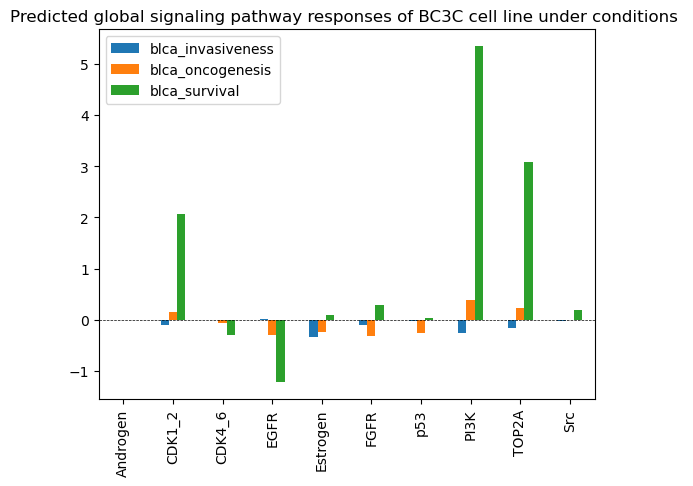

In [21]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [23]:
display(rm_filt)
rm_subset=rm_filt[['Androgen','CDK1_2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A','Src']]

,Androgen,CDK1_2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,Src,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,-0.045913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1_2,0.0,-1.000000,0.000000,0.109106,0.000000,0.128676,0.229869,0.000000,0.000000,0.087885,0.0,0.0,0.0
CDK4_6,0.0,0.000000,-1.000000,0.365506,0.000000,0.000000,0.145118,0.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.235066,-1.000000,0.000000,0.000000,-0.295848,0.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,-1.000000,0.261690,0.138157,0.000000,0.000000,0.051898,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.353848,0.000000,-1.000000,0.119093,0.130547,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.385848,0.000000,-0.205621,0.000000,0.000000,-1.000000,0.000000,0.576388,0.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.239493,0.000000,0.000000,0.176651,-1.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,-0.130123,0.000000,0.000000,0.168019,0.000000,-1.000000,0.000000,0.0,0.0,0.0
Src,0.0,0.000000,0.000000,0.259647,0.538719,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0


In [24]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.000000,0.000000,0.000000
CDK1_2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,0.000000,0.000000,0.000000
Estrogen,-0.316768,-0.232654,0.000000
FGFR,0.000000,-0.273079,0.000000
PI3K,-0.151732,0.359049,3.977104
p53,0.000000,-0.221711,0.000000
TOP2A,0.000000,0.000000,0.000000
Src,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

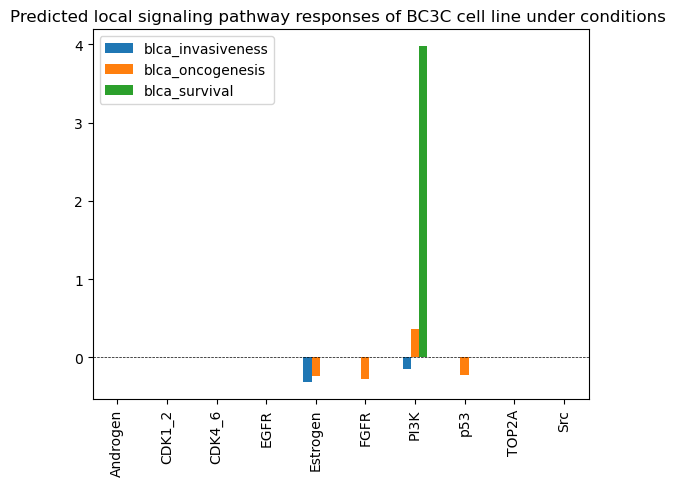

In [25]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")